In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hours = pd.read_csv("data/Book1.csv")
df_title = pd.read_csv("data/games_steam.csv")
df_release = pd.read_csv("data/games_data.csv", encoding= 'unicode_escape')

# EMPEZAMOS A TRABAJAR CON EL CSV DE HORAS Y PLAYERS,de aqui sacarémos los top 10 videojuegos jugados en referencia a horas y nº de Players


In [3]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,"944,895","411,196,700"
1,2,Lost Ark,"580,042","279,812,296"
2,3,Dota 2,"719,422","326,014,122"
3,4,PUBG: BATTLEGROUNDS,"524,023","159,781,183"
4,5,Apex Legends,"370,651","137,813,200"


In [4]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    200 non-null    int64 
 1   
Name                 200 non-null    object
 2   Peak No. of Players   200 non-null    object
 3   Hours Played          200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [5]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,"944,895","411,196,700"
1,2,Lost Ark,"580,042","279,812,296"
2,3,Dota 2,"719,422","326,014,122"
3,4,PUBG: BATTLEGROUNDS,"524,023","159,781,183"
4,5,Apex Legends,"370,651","137,813,200"


In [6]:
df_hours.columns

Index(['ID', '\nName', 'Peak No. of Players ', 'Hours Played'], dtype='object')

In [7]:
df_hours['Hours Played']=df_hours['Hours Played'].str.replace(',','').astype('float64')


In [8]:
df_hours['Peak No. of Players '] = df_hours['Peak No. of Players '].str.replace(',','').astype('float64')

In [9]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   
Name                 200 non-null    object 
 2   Peak No. of Players   200 non-null    float64
 3   Hours Played          200 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [10]:
df_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,1.005000e+02,5.787918e+01,1.0,50.75,100.5,150.25,200.0
Peak No. of Players,200.0,4.044411e+04,1.051887e+05,2964.0,7609.50,14464.0,29625.50,944895.0
Hours Played,200.0,1.612826e+07,4.489661e+07,164366.0,2862349.25,4758623.5,11851169.75,411196700.0


In [11]:
#TOP JUEGOS POR HORAS DE TIEMPO JUGADAS
Max10Played = df_hours.sort_values(by='Hours Played',ascending=False).head(10)
Max10Played

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
5,6,Grand Theft Auto V,138025.0,60165044.0
9,10,Rust,141983.0,57656656.0
11,12,Team Fortress 2,94815.0,53764425.0
16,17,Destiny 2,93881.0,41697664.0


In [12]:
#TOP JUEGOS POR  NÚMERO DE JUGADORES 
Max10Play = df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
Max10Play

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
9,10,Rust,141983.0,57656656.0
6,7,NARAKA: BLADEPOINT,138617.0,39020908.0
5,6,Grand Theft Auto V,138025.0,60165044.0
12,13,Dread Hunger,107437.0,31239372.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
def generate_cloud_normal(column, filename):

    text = " ".join(cat for cat in df_hours[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    plt.imshow(word_cloud)
    plt.axis("off")

    
    plt.show()

    word_cloud.to_file(f'data/{filename}.png')

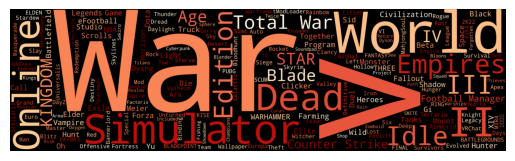

In [15]:
generate_cloud_normal("\nName", "Hours Played" )

In [16]:
top10Players=df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
top10Players

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
9,10,Rust,141983.0,57656656.0
6,7,NARAKA: BLADEPOINT,138617.0,39020908.0
5,6,Grand Theft Auto V,138025.0,60165044.0
12,13,Dread Hunger,107437.0,31239372.0


Text(0.5, 1.0, 'Top 10 Players on')

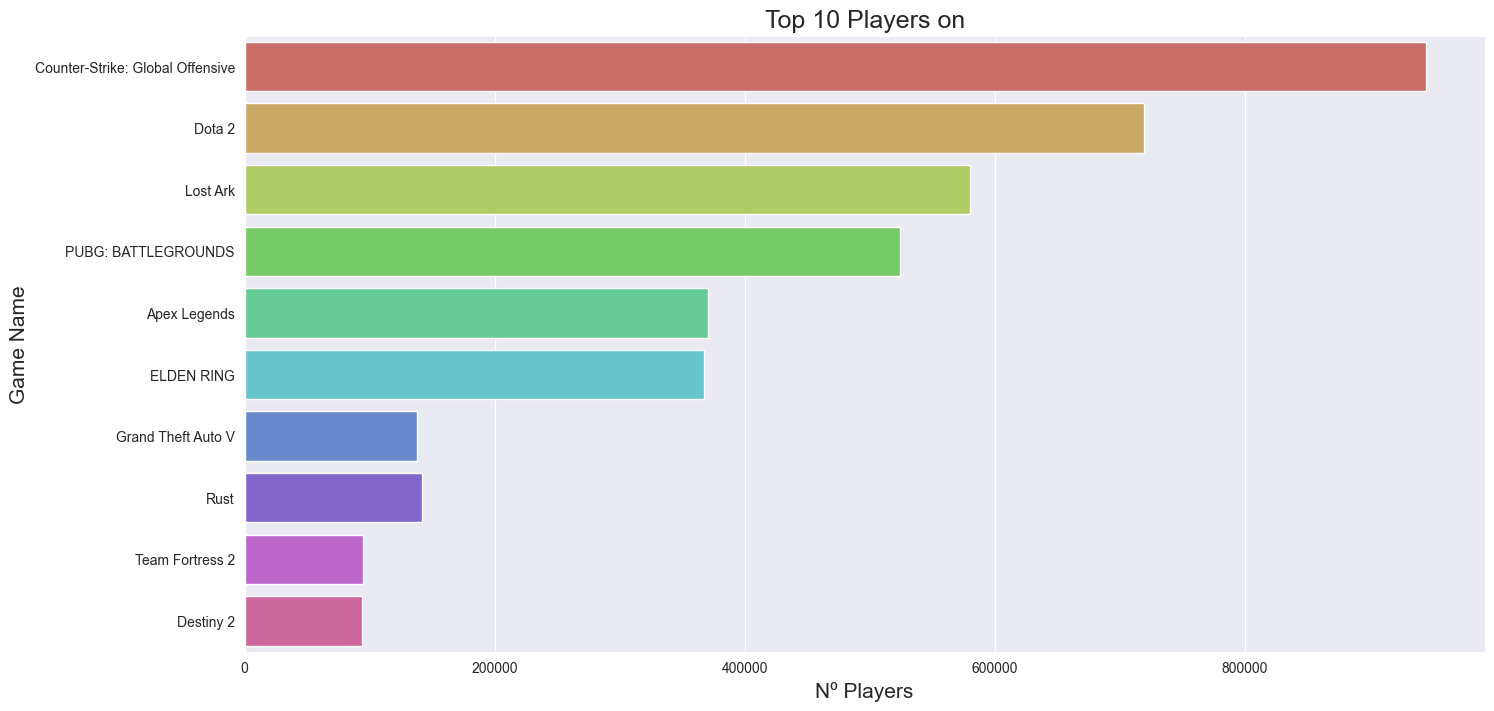

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='Peak No. of Players ',y='\nName',data=Max10Played,palette='hls')
plt.ylabel('Game Name',fontsize=15)
plt.xlabel('Nº Players',fontsize=15)
plt.title('Top 10 Players on',fontsize=18)

# AHORA INTENTAREMOS ENRIQUECER LA INFORMACIÓN CON  AÑOS DE LANZAMIENTO Y GENEROS DE LOS MISMOS, POR LO QUE INTENTAREMOS CONSEGUIR FILTROS DE LOS JUEGOS MAS JUGADOS SEGÚN SUS GENEROS Y VALORACIONES.
#Serán los titulos más valorados los más jugados ?
#Serán los juegos más jugados los mejores valorados? 
#INTENTAREMOS RESPONDER  A ESTAS QUESTIONES A PARTIR DE ESTE DATAFRAME . 
#UN 

In [18]:
df_title.head(10)

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
5,Ricochet,Nov 1 2000,0,1965,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
6,Half-Life,Nov 8 1998,96,12486,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
7,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
8,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
9,Half-Life: Blue Shift,Jun 1 2001,71,2219,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [19]:
df_title.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


In [22]:
df_title.isnull().sum()

ResponseName                    0
ReleaseDate                    86
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

In [23]:
#Calculamos el porcentaje de nulos que tiene nuestro dataset y en qué columna


nulos = (df_title.isnull().sum() / df_title.shape[0] * 100).reset_index()
nulos = nulos[nulos[0] > 0]
nulos.columns = ["columnas", "%_nulos"]
nulos

,columnas,%_nulos
1,ReleaseDate,0.681242


# Vamos a crear una columna nueva en la que extraigamos solamente los años de lanzamiento y a partir de la misma sacaremos la cantidad de juegos que han salido por año

In [24]:
df_title= df_title.assign(Year = "")

In [25]:
df_title.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,Year
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,


In [26]:
df_title.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'IsFree', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
       'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer',
       'PriceInitial', 'Year'],
      dtype='object')

In [27]:
TopRated = df_title.sort_values(by='Metacritic',ascending=False).head(10)
TopRated

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,Year
3088,Grand Theft Auto V,Apr 13 2015,96,136846,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,
6,Half-Life,Nov 8 1998,96,12486,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,
232,BioShock(tm),Aug 21 2007,96,16260,False,False,False,True,False,False,False,True,False,False,False,False,False,False,19.99,
10,Half-Life 2,Nov 16 2004,96,35792,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,
928,Portal 2,Apr 18 2011,95,73144,False,False,False,True,True,False,False,False,False,False,False,False,False,False,19.99,
26,Portal 2,Apr 18 2011,95,73128,False,False,False,True,True,False,False,False,False,False,False,False,False,False,19.99,
24,Portal 2,Apr 18 2011,95,73128,False,False,False,True,True,False,False,False,False,False,False,False,False,False,19.99,
631,Mass Effect 2,Jan 26 2010,94,7263,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,
273,BioShock Infinite,Mar 25 2013,94,55512,False,False,False,True,False,False,False,False,False,False,False,False,False,False,29.99,
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,


Text(0.5, 1.0, 'Top 10 Games by Rating')

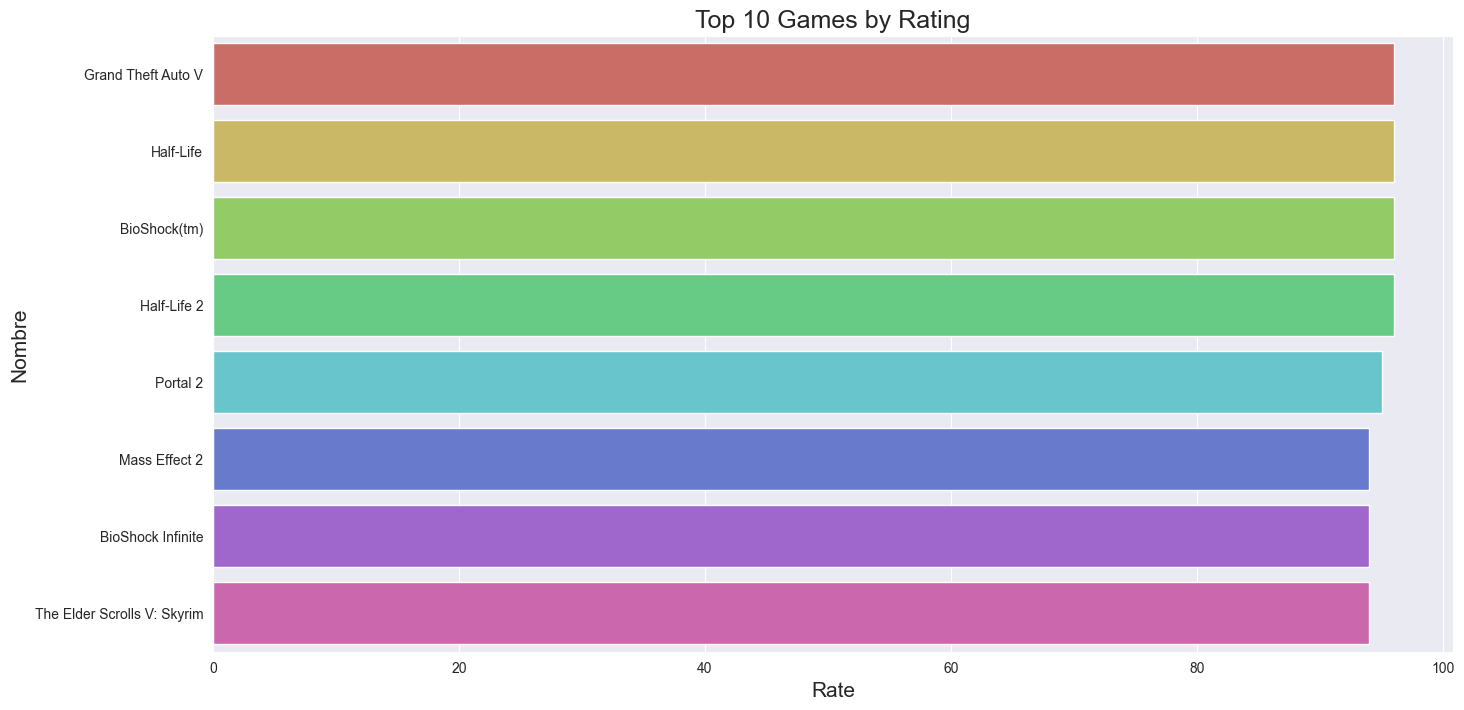

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='Metacritic',y='ResponseName',data=TopRated,palette='hls')
plt.ylabel('Nombre',fontsize=15)
plt.xlabel('Rate',fontsize=15)
plt.title('Top 10 Games by Rating',fontsize=18)

In [29]:
df_release.head(10)

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0
1,1,Dota 2,2013-07-09,Valve,Valve,Action;Free to Play;Strategy,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,Positive,Very Positive,1885261,82%,1,1.0,1.0
2,2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,NaN,NaN,"2,199","2,199",Positive,Mostly Positive,26092,72%,1,0.0,0.0
3,3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,NaN,NaN,"4,999","4,999",Mixed,Mixed,215969,64%,1,0.0,0.0
4,4,Apex Legends,NaN,NaN,NaN,NaN,NaN,Free to play,Free to play,Positive,Very Positive,539297,85%,1,0.0,0.0
5,5,PUBG: BATTLEGROUNDS,NaN,NaN,NaN,NaN,NaN,Free to play,Free to play,Mixed,Mixed,2109992,56%,1,0.0,0.0
6,6,NARAKA: BLADEPOINT,NaN,NaN,NaN,NaN,NaN,"1,199","1,199",Positive,Mostly Positive,130245,73%,1,0.0,0.0
7,7,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Behaviour Digital Inc.,Action,Multi-player;Online Multi-Player;Co-op;Online ...,749,749,Positive,Very Positive,453698,81%,1,0.0,0.0
8,8,Warframe,2013-03-25,Digital Extremes,Digital Extremes,Action;Free to Play,Single-player;Multi-player;Co-op;Steam Trading...,Free to play,Free to play,Positive,Very Positive,512887,87%,1,0.0,0.0
9,9,War Thunder,2013-08-15,Gaijin Entertainment,Gaijin Entertainment,Action;Free to Play;Massively Multiplayer;Simu...,Single-player;MMO;Co-op;Cross-Platform Multipl...,Free to play,Free to play,Positive,Mixed,28437,48%,1,1.0,1.0


In [30]:
df_release["price"].unique

<bound method Series.unique of 0        Free to play
1        Free to play
2               2,199
3               4,999
4        Free to play
             ...     
73340    Free to play
73341             219
73342    Free to play
73343    Free to play
73344    Free to play
Name: price, Length: 73345, dtype: object>

In [ ]:
df_release.info()